#DAV 6150 Module 13 Assignment: *Using Neural Nets to Predict Sharing of Online News Articles*

#### Team members

- Manvitha Karanam
- Vinicius Giannaccini


## **Introduction**

In this assignment, we explore the application of feed-forward, back-propagating neural networks to predict the popularity level of online news articles.

Using a dataset containing over 39,000 news articles and 61 attributes, our goal is to create a categorical indicator variable called `share_level`, which classifies articles into "low", "medium", or "high" popularity based on the number of shares.

To accomplish this, we will:
- **Load and prepare the data**: including engineering the new `share_level` variable.
- **Conduct exploratory data analysis (EDA)** to understand feature distributions and relationships.
- **Apply feature selection techniques** to identify important predictors.
- **Build and train three neural network models**, varying hyperparameters to compare performance.
- **Select the best performing model** based on evaluation metrics.
- **Draw conclusions** based on model results and share insights on the prediction task.


## **Data Summary**  

### Here's a detailed breakdown of the dataset features:  

# 1. URL and Time-Related Features  
- **url**: The URL of the article (non-predictive) — this is just an identifier, not used for prediction.  
- **timedelta**: Number of days between the publication of the article and when the dataset was acquired — useful for tracking how the article performs over time.  

# 2. Content-Based Features  
- **n_tokens_title**: Number of words in the article's title — longer or shorter titles may affect how catchy the article is.  
- **n_tokens_content**: Number of words in the article's content — this captures how much information the article contains.  
- **n_unique_tokens**: Rate of unique words in the content — a measure of vocabulary diversity.  
- **n_non_stop_words**: Proportion of non-stop words (i.e., content words) in the article — articles with more meaningful words might be more engaging.  
- **n_non_stop_unique_tokens**: Proportion of unique non-stop words — indicates how varied and content-rich the article is.  

# 3. Link and Multimedia Features  
- **num_hrefs**: Number of hyperlinks in the article — could reflect how well-connected the article is with external sources.  
- **num_self_hrefs**: Number of self-referencing links (links to other articles on the same website) — this may indicate whether the article promotes internal content.  
- **num_imgs**: Number of images in the article — articles with more images may be more visually appealing and shareable.  
- **num_videos**: Number of videos in the article — video content might affect engagement and sharing.  

# 4. Text and Keywords Features  
- **average_token_length**: Average length of words in the article — longer words may indicate more complex content.  
- **num_keywords**: Number of keywords assigned to the article in its metadata — articles with well-defined keywords may perform better in search engines and attract more traffic.  

# 5. Data Channel (Topic) Features  
These features indicate the category or topic of the article. Only one of these will be True for each article.  
- **data_channel_is_lifestyle**: Is the article in the Lifestyle category?  
- **data_channel_is_entertainment**: Is the article in Entertainment?  
- **data_channel_is_bus**: Is the article in Business?  
- **data_channel_is_socmed**: Is the article about Social Media?  
- **data_channel_is_tech**: Is the article about Technology?  
- **data_channel_is_world**: Is the article about World news?  

# 6. Keyword Sharing Metrics  
These features measure the shares of articles based on their keyword performance.  
- **kw_min_min, kw_max_min, kw_avg_min**: Minimum, maximum, and average number of shares for the least popular keyword.  
- **kw_min_max, kw_max_max, kw_avg_max**: Minimum, maximum, and average number of shares for the most popular keyword.  
- **kw_min_avg, kw_max_avg, kw_avg_avg**: Minimum, maximum, and average number of shares for all keywords.  

# 7. Self-Reference Features  
- **self_reference_min_shares**: Minimum shares of articles that were referenced by the article.  
- **self_reference_max_shares**: Maximum shares of referenced articles.  
- **self_reference_avg_sharess**: Average shares of referenced articles — these features help indicate whether popular internal references impact shares.  

# 8. Publication Timing Features  
These features indicate whether the article was published on a specific day or on the weekend:  
- **weekday_is_monday, weekday_is_tuesday, ..., weekday_is_sunday**: Booleans indicating the day of the week the article was published.  
- **is_weekend**: Boolean indicating if the article was published on the weekend (Saturday or Sunday).  

# 9. Latent Dirichlet Allocation (LDA) Features  
These features capture the closeness of the article to different topics generated using LDA, a topic modeling technique. Articles are scored based on their similarity to five topics (LDA_00 to LDA_04).  
- **LDA_00, LDA_01, LDA_02, LDA_03, LDA_04**: Closeness to topics, useful for topic-based modeling.  

# 10. Sentiment and Polarity Features  
These features measure the sentiment (positive/negative) and subjectivity (factual/opinion-based) of both the article's title and content:  
- **global_subjectivity**: Overall subjectivity of the article's content (closer to 1 means more subjective, closer to 0 means more objective).  
- **global_sentiment_polarity**: Overall sentiment polarity of the article (positive or negative).  
- **global_rate_positive_words**: Proportion of positive words in the content.  
- **global_rate_negative_words**: Proportion of negative words in the content.  
- **rate_positive_words**: Proportion of positive words excluding neutral ones.  
- **rate_negative_words**: Proportion of negative words excluding neutral ones.  
- **avg_positive_polarity**: Average polarity of positive words (how positive they are).  
- **min_positive_polarity**: Minimum polarity score among positive words.  
- **max_positive_polarity**: Maximum polarity score among positive words.  
- **avg_negative_polarity**: Average polarity of negative words (how negative they are).  
- **min_negative_polarity**: Minimum polarity score among negative words.  
- **max_negative_polarity**: Maximum polarity score among negative words.  
- **title_subjectivity**: Subjectivity score of the title.  
- **title_sentiment_polarity**: Sentiment polarity score of the title.  
- **abs_title_subjectivity**: Absolute subjectivity level of the title.  
- **abs_title_sentiment_polarity**: Absolute polarity level of the title.  

# 11. Target Variable  
- **shares**: The number of shares the article received.  
This is the target variable that the dataset is trying to predict based on the above features.  


### Load the data:
A. Import Python Libraries
Import all libraries that are required for our analysis, such as Data Loading, Statistical analysis, Visualization etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations.

Matplotlib and Seaborn have been used for Data visualizations.

GitHub sourhttps://github.com/manvithakakollu/dav_6150_datascience/blob/manvitha/M4_Data.csvce link:

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
# Ignore any warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

Next, we use the `read_csv()` function from pandas to load the dataset from a CSV file into a DataFrame. The data is stored in the variable `article_data`, which allows us to perform further data analysis and manipulations.


In [279]:
article_data = pd.read_csv(
    "https://raw.githubusercontent.com/manvithakakollu/dav_6150_datascience/manvitha/M4_Data.csv",
    delimiter=',',  # If another delimiter is used
    quoting=csv.QUOTE_NONE  # If there are issues with quotation marks
)


In [280]:
article_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

The `info()` function shows complete details of the data and the data types of the features.

In [282]:
article_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [283]:
article_data.shape

(39644, 61)

The `shape` method tells us that the dataset contains `39644` rows, and each row contains `61` attributes.

In [285]:
# Get the number of unique values for each column in the dataset
unique_values_count = article_data.nunique()

# Display the result
print(unique_values_count)


url                              39644
 timedelta                         724
 n_tokens_title                     20
 n_tokens_content                 2406
 n_unique_tokens                 27281
                                 ...  
 title_subjectivity                673
 title_sentiment_polarity          813
 abs_title_subjectivity            532
 abs_title_sentiment_polarity      653
 shares                           1454
Length: 61, dtype: int64


In [286]:
article_data.columns = article_data.columns.str.strip()

The `strip()` function is used to remove spaces from the feature headings. It is always advisable to standardize column names and remove spaces in the dataset to improve readability and prevent potential issues during analysis.

In [288]:
article_data = article_data.drop(columns=['url', 'timedelta'])
article_data.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


Next, we drop the `url` and `timedelta` columns, as they may not be relevant for our analysis.

In [290]:
article_data.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

There are no null values in the dataset. This makes the data more readable and easier for model training.

## **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing datasets to summarize their main characteristics, identify patterns, spot anomalies.

In [294]:
# columns to change the datatype
columns_to_convert = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
    'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday', 'is_weekend'
]

# Convert the columns to object data type
article_data[columns_to_convert] = article_data[columns_to_convert].astype('object')

Since these features are categorical, we'll convert their datatype to object.

In [296]:
# sanity check
print(article_data.dtypes)

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle         object
data_channel_is_entertainment     object
data_channel_is_bus               object
data_channel_is_socmed            object
data_channel_is_tech              object
data_channel_is_world             object
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

### **Univariate Analysis**

In [298]:
# Create function to plot dist and box plot for all the numeric features.

def box_dist_plot(article_data , column):


    """

    This function is to plot box-plot and distribution-plot for a given column,
    column's median value, with count and percentage of null values.

    Parameters :-
        df : Dataframe           # df contains Dataframe.
        column : str             # Column name which is to be ploted.

    """

    plt.style.use('ggplot')

    plt.figure(figsize=(18, 7))

    # Box plot.
    plt.subplot(121)
    sns.boxplot(y = article_data[column])  # Create box plot
    plt.title(f'Box Plot of : {column}')

    # Distribution plot.
    plt.subplot(122)
    sns.histplot(article_data[column], bins=30, kde=True)  # Create histogram with KDE
    plt.title(f'Distribution Plot of : {column}')

    # Adjusting the layout.
    plt.tight_layout()

    plt.show()

    # To print statistics.
    print(article_data[column].describe())
    print('Median :', article_data[column].median())
    print()
    print('Total Number of null values :', article_data[column].isnull().sum(), 'count,',
          round(article_data[column].isnull().mean() * 100, 2), '%')

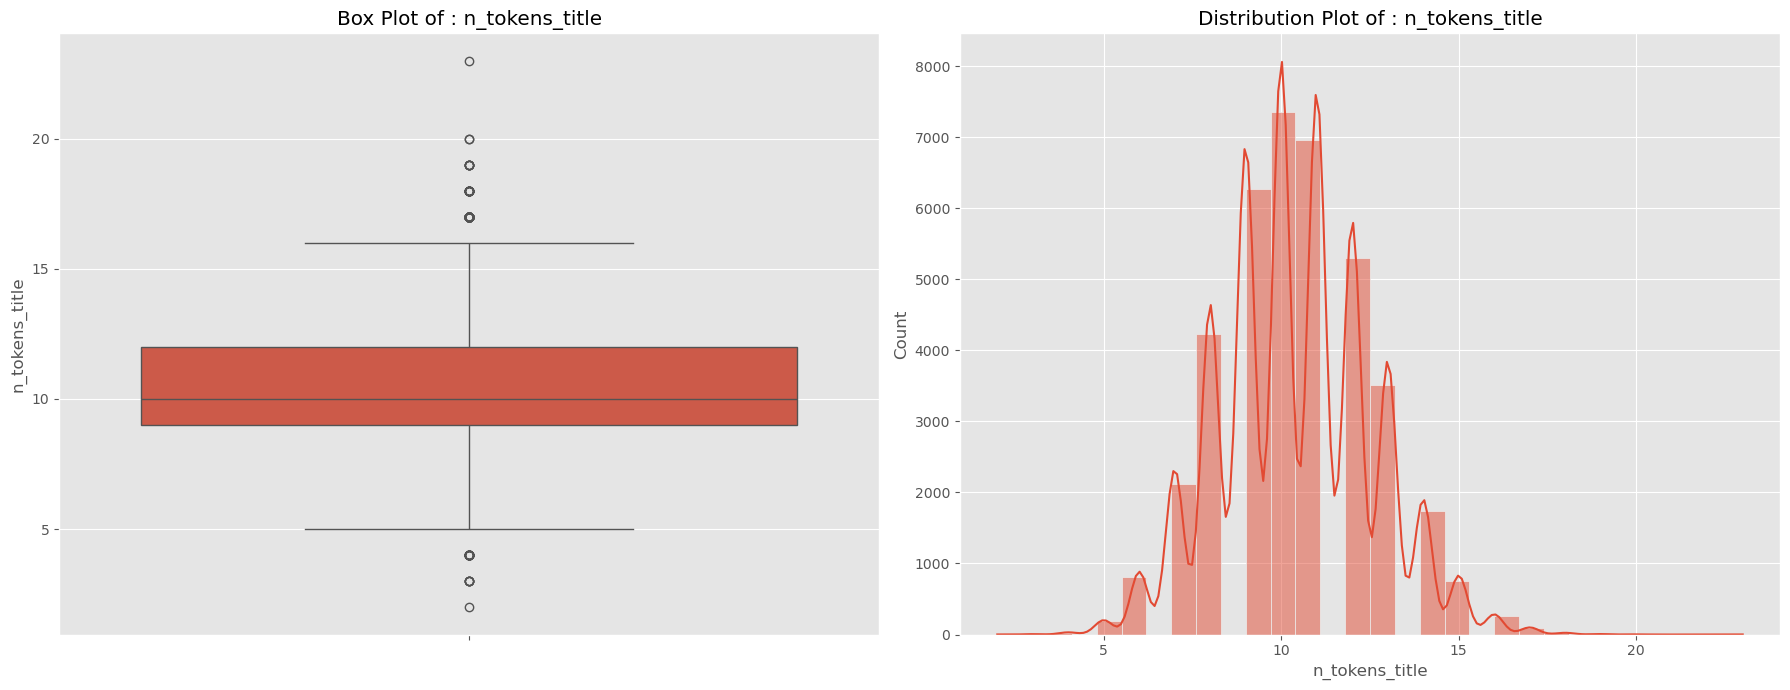

count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64
Median : 10.0

Total Number of null values : 0 count, 0.0 %


In [299]:
#calling the function
box_dist_plot(article_data,'n_tokens_title')

Here, n_tokens_title represents the number of words in the title. The data is approximately normally distributed but contains outliers."

In [ ]:
# calling the function
box_dist_plot(article_data, 'n_tokens_content')

 n_tokens_content represents the number of words in the content. The data is right-skewed and contains outliers.

In [ ]:
# calling the function
box_dist_plot(article_data, 'n_unique_tokens')

n_unique_tokens represents the rate of unique words in the content. The data is right-skewed and contains outliers

In [ ]:
# calling the function
box_dist_plot(article_data, 'num_imgs')

num_hrefs represents the number of links. The data is right-skewed and contains outliers.

In [ ]:
# calling the function
box_dist_plot(article_data, 'n_non_stop_words')

n_non_stop_words represents the rate of non-stop words in the content. The data is right-skewed and contains outliers

In [ ]:
# calling the function
box_dist_plot(article_data, 'n_non_stop_unique_tokens')

n_non_stop_unique_tokens represents the rate of unique non-stop words in the content. The data is right-skewed and contains outliers.

In [ ]:
#calling the function
box_dist_plot(article_data, 'num_hrefs')

 represents the number of links. The data is right-skewed and contains outliers

In [ ]:
#calling the function
box_dist_plot(article_data, 'num_self_hrefs')

num_self_hrefs represents the number of links to other articles published by Mashable. The data is right-skewed and contains outliers

In [ ]:
# calling the function
box_dist_plot(article_data, 'num_videos')

num_videos represents the number of videos. The data is right-skewed and contains outliers

In [ ]:
box_dist_plot(article_data, 'kw_min_max')

The kw_min_max represents the best keyword's minimum share. The data is right-skewed and contains outliers.

In [ ]:
# calling the function
box_dist_plot(article_data, 'average_token_length')

average_token_length represents the average length of words in the content. The data is normally distributed and contains outliers

In [ ]:
# calling the function
box_dist_plot(article_data, 'num_keywords')

num_keywords represents the number of keywords in the metadata. The data is left-skewed and contains only one outlier.

In [ ]:
#calling the function
box_dist_plot(article_data, 'kw_min_min')

 kw_min_min represents Worst keyword minimum share.The data is right-skewed and contains outliers

In [ ]:
#calling the function
box_dist_plot(article_data, 'kw_max_min')

kw_max_min represents the maximum share of the worst keyword. The data is right-skewed and contains outliers.

In [ ]:
#calling the function
box_dist_plot(article_data, 'kw_avg_min')

kw_avg_min represents the average share of the worst keyword. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'kw_max_max')

kw_max_max represents the maximum share of the best keyword. The data is left-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'kw_avg_max')

kw_avg_max represents the average share of the best keyword. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'kw_min_avg')

kw_min_avg represents the minimum share of the average keyword. The data is right-skewed and contains no outliers.

In [ ]:
box_dist_plot(article_data, 'kw_max_avg')

kw_max_avg represents the maximum share of the average keyword. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'kw_avg_avg')

kw_avg_avg represents the average share of the average keyword. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'self_reference_min_shares')

self_reference_min_shares represents the minimum shares of referenced articles on Mashable. The data is right-skewed and contains outliers

In [ ]:
box_dist_plot(article_data, 'self_reference_max_shares')

self_reference_max_shares represents the maximum shares of referenced articles on Mashable. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'self_reference_avg_sharess')

self_reference_max_shares represents the maximum shares of referenced articles on Mashable. The data is right-skewed and contains outliers.

In [ ]:
article_data[['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']].hist(figsize=(10,10), bins=20)
plt.show()

In [ ]:
article_data[['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']].boxplot(figsize=(6,6))
plt.show()

article_data[['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']].describe()

LDA_00 represents the closeness to LDA topic 0. The data is right-skewed and contains outliers.

LDA_01 represents the closeness to LDA topic 1. The data is right-skewed and contains outliers.

LDA_02 represents the closeness to LDA topic 2. The data is right-skewed and contains outliers.

LDA_03 represents the closeness to LDA topic 3. The data is right-skewed and contains outliers.

LDA_04 represents the closeness to LDA topic 4. The data is right-skewed and contains no outliers.

In [ ]:
# calling the function
box_dist_plot(article_data, 'global_subjectivity')

The global_subjectivity represents the text's subjectivity. The data is normally distributed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'global_sentiment_polarity')

The global_sentiment_polarity represents the text's sentiment polarity. The data is normally distributed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'global_rate_positive_words')

global_rate_positive_words represents the rate of positive words in the content. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'global_rate_negative_words')


global_rate_negative_words represents the rate of negative words in the content. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'rate_positive_words')


The rate_positive_words represents the rate of positive words among non-neutral tokens. The data is left-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'rate_negative_words')

rate_negative_words represents the rate of negative words among non-neutral tokens. The data is right-skewed and contains outliers

In [ ]:
box_dist_plot(article_data, 'avg_positive_polarity')

avg_positive_polarity represents the average polarity of positive words. The data is normally distributed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'min_positive_polarity')


min_positive_polarity represents the minimum polarity of positive words. The data is right-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'max_positive_polarity')

max_positive_polarity represents the maximum polarity of positive words. The data is left-skewed and contains no outliers.

In [ ]:
box_dist_plot(article_data, 'min_negative_polarity')


The avg_negative_polarity represents the average polarity of negative words. The data is left-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'max_negative_polarity')

max_negative_polarity represents the maximum polarity of negative words. The data is left-skewed and contains outliers.

In [ ]:
box_dist_plot(article_data, 'title_subjectivity')

The title_subjectivity represents the subjectivity level. The data is right-skewed and contains no outliers.

In [ ]:
# calling the function
box_dist_plot(article_data, 'title_sentiment_polarity')

The title_sentiment_polarity measures the sentiment polarity. The data is normally distributed and contains outliers

In [ ]:
# calling the function
box_dist_plot(article_data, 'abs_title_subjectivity')

The abs_title_subjectivity represents the absolute subjectivity level . The data is left-skewed and contains no outliers

In [ ]:
# calling the function
box_dist_plot(article_data, 'abs_title_sentiment_polarity')

The abs_title_sentiment_polarity represents the absolute polarity level . The data is right-skewed and contains outliers.

In [ ]:
# calling the function
box_dist_plot(article_data, 'shares')

There are a few outliers. Most shares are between 0 and 1000, and the distribution is right-skewed

In [ ]:
# Generates a count plot and displays the count of each category for a specified column in the dataframe.

def plot_category_counts(article_data, column):

    """
    A function to plot a countplot and  displays the count of each category
    for a specified column in the dataframe.

        column : str
        The name of the categorical column to plot and count.
    """

    # Count plot for the specified column.
    plt.figure(figsize=(10, 6))
    sns.countplot(data=article_data, x=column, palette="viridis")


    # Set plot labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Count of {column}')

    # Display the plot
    plt.show()

    # Display count of each category
    counts = article_data[column].value_counts()
    print(f"\nCounts for {column}:\n{counts}")

    #For unique count of input
    unique_count = article_data[column].nunique()
    print(f"\nUnique for {column}:\n{unique_count}")

In [ ]:
plot_category_counts(article_data, 'data_channel_is_lifestyle')

The data_channel_is_lifestyle variable represents whether the data channel is 'Lifestyle'. It contains two unique values, 0 and 1, with 0 being the most frequent

In [ ]:
plot_category_counts(article_data, 'data_channel_is_entertainment')

The data_channel_is_entertainment variable represents whether the data channel is 'Entertainment'. It contains two unique values, 0 and 1, with 0 having the highest count.

In [ ]:

plot_category_counts(article_data, 'data_channel_is_bus')

The data_channel_is_bus represents whether the data channel is 'Business'. It contains two unique values 0 and 1, with the count of 0 being the highest

In [ ]:
plot_category_counts(article_data, 'data_channel_is_socmed')

The data_channel_is_socmed represents whether the data channel is 'Social Media'. It contains two unique values 0 and 1, with the count of 0 being the highest

In [ ]:
plot_category_counts(article_data, 'data_channel_is_tech')

The data_channel_is_tech variable represents whether the data channel is 'Tech'. It contains two unique values, 0 and 1, with 0 occurring most frequently.

In [ ]:
plot_category_counts(article_data, 'data_channel_is_world')

The data_channel_is_world represents whether the data channel is 'World'. It contains two unique values 0 and 1, with the count of 0 being the highest.

In [ ]:
# Select the relevant columns for days of the week
days_columns = article_data[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
                   'weekday_is_thursday', 'weekday_is_friday',
                   'is_weekend']]
# Reshape the data into a long format
df_melted_days = pd.melt(days_columns, var_name='day_of_week', value_name='count')
df_melted_days

In [ ]:
# Plot using a grouped countplot
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_melted_days, x='day_of_week', hue='count')
plt.title('Comparison of Article Counts by Day of the Week')
plt.xlabel('Published Day of the Week')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.show()

Selected only the columns related to the days of the week from the dataset.
Transformed the data into a long format to show each day and its corresponding count.

### **Bivariate Analysis**

In [ ]:
# To find Correlation between the numerical columns to do bivariate analysis.
article_data.corr()

In [ ]:
# Grouping columns based on their purpose

# Text and Content Features
text_content_features = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
    'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
    'num_keywords'
]

# Weekday Features (Binary columns indicating each day of the week)
weekday_features = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
    'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
    'weekday_is_sunday', 'is_weekend'
]

# Data Channel Features (Binary columns indicating which channel)
data_channel_features = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
    'data_channel_is_world'
]

# Keyword Features (Keyword statistics)
keyword_features = [
    'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
    'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg'
]

# Self-reference Features (Self-reference shares statistics)
self_reference_features = [
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'
]

# Sentiment and Subjectivity Features
sentiment_subjectivity_features = [
    'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
    'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity',
    'abs_title_sentiment_polarity'
]

# LDA Features (Latent Dirichlet Allocation topics)
lda_features = [
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'
]

# Numeric Columns (The columns that are numeric and can be used for analysis)
numeric_columns = [
    'shares'  # This would be your target variable, often numeric
]

# Combine all the groups into a dictionary for easy reference
column_groups = {
    "Text and Content Features": text_content_features,
    "Weekday Features": weekday_features,
    "Data Channel Features": data_channel_features,
    "Keyword Features": keyword_features,
    "Self-reference Features": self_reference_features,
    "Sentiment and Subjectivity Features": sentiment_subjectivity_features,
    "LDA Features": lda_features,
    "Numeric Columns": numeric_columns
}

# Display the grouped columns
for group, columns in column_groups.items():
    print(f"{group}: {columns}\n")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation matrix
correlation_content_data = article_data[text_content_features]

# Compute the correlation matrix
correlation_matrix = correlation_content_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix of Text Content Features')

# Show the plot
plt.tight_layout()
plt.show()


Displays the correlation between various text content features such as `n_tokens_title`, `n_tokens_content`, `n_unique_tokens`, 
Dark red indicates a strong positive correlation, dark blue indicates a strong negative correlation, and lighter colors indicate weak or no correlation.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation matrix
correlation_data_sentiment = article_data[sentiment_subjectivity_features]

# Compute the correlation matrix
correlation_matrix_sentiment = correlation_data_sentiment.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_sentiment, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix of Sentiment and Subjectivity Features')

# Show the plot
plt.tight_layout()
plt.show()


Articles with more positive words usually have a higher sentiment score.
Strong connection between avg_negative_polarity and min_negative_polarity since both measure negativity.
Title sentiment does not strongly relate to the full text, meaning a title’s emotion might not match the article’s tone.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation matrix
correlation_data_self_reference = article_data[self_reference_features]

# Compute the correlation matrix
correlation_matrix_self_reference = correlation_data_self_reference.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_self_reference, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix of Self Reference Features')

# Show the plot
plt.tight_layout()
plt.show()


Some articles have a big gap between their least and most shared instances.

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Scatter plot of n_tokens_title vs. shares
axes[0].scatter(article_data['n_tokens_title'], article_data['shares'])
axes[0].set_title('n_tokens_title vs. shares')
axes[0].set_xlabel('n_tokens_title')
axes[0].set_ylabel('shares')



# Scatter plot of n_unique_tokens vs. shares
axes[1].scatter(article_data['n_unique_tokens'],  article_data['shares'])
axes[1].set_title('n_unique_tokens vs. shares')
axes[1].set_xlabel('n_unique_tokens')
axes[1].set_ylabel('shares')

# Display the plots
plt.tight_layout()
plt.show()



In the n_tokens_title vs. shares scatter plot, we can see a pyramid-like shape. Most data points are at the bottom, with fewer as the number of title tokens increases. This suggests that articles with a moderate number of title tokens are more common, while very short or long titles are less frequent.

In the n_unique_tokens vs. shares plot, the points move in a straight line going up. This shows that as the number of unique tokens increases, the number of shares tends to go up too, but there aren't many extreme values.

In [ ]:

import matplotlib.pyplot as plt

# Create the first plot (num_imgs vs num_videos)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.scatter(article_data['num_imgs'],article_data['num_videos'])
ax1.set_title('num_imgs vs num_videos')
ax1.set_xlabel('num_imgs')
ax1.set_ylabel('num_videos')

# Display the first plot
plt.tight_layout()
plt.show()


Most articles have only a few images and videos, and it's rare to see a lot of both in the same article. When the number of images goes up, the number of videos usually stays low.

In [ ]:
# Create the second plot (num_hrefs vs num_self_hrefs)
fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.scatter(article_data['num_hrefs'], article_data['num_self_hrefs'])
ax2.set_title('num_hrefs vs. num_self_hrefs')
ax2.set_xlabel('num_hrefs')
ax2.set_ylabel('num_self_hrefs')

# Display the second plot
plt.tight_layout()
plt.show()


Most articles have a small number of links and self-references, as seen in the cluster at the bottom left.
The triangular shape suggests that as the total number of links increases, self-references also increase but at a slower rate.

In [ ]:

# Create a scatter plot for n_non_stop_words vs n_non_stop_unique_tokens
plt.figure(figsize=(8, 6))
plt.scatter(article_data['n_non_stop_words'], article_data['n_non_stop_unique_tokens'])
plt.title('n_non_stop_words vs n_non_stop_unique_tokens')
plt.xlabel('n_non_stop_words')
plt.ylabel('n_non_stop_unique_tokens')

# Display the plot
plt.tight_layout()
plt.show()

There are only a few points, which might mean some data is missing or limited. One article has very few non-stop words, while another has a lot more, showing a big difference between them.

In [ ]:
# Create a scatter plot to explore the relation between avg_negative_polarity and min_negative_polarity
sns.scatterplot(x='avg_negative_polarity', y='min_negative_polarity', data=article_data, color='c')

# Add title and display the plot
plt.title('Scatter Plot: Relation between avg_negative_polarity and min_negative_polarity')
plt.xlabel('avg_negative_polarity')
plt.ylabel('min_negative_polarity')

plt.show()

The points go up in a pattern, meaning that as overall negativity increases, the most negative word also gets more negative.
Many points are grouped together, which means a lot of articles have similar negativity, likely using common negative words.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to explore the relation between global_rate_negative_words and global_rate_positive_words
sns.scatterplot(x='global_rate_negative_words', y='global_rate_positive_words', data=article_data, color='b')

# Add title and labels
plt.title('Scatter Plot: Relation between global_rate_negative_words and global_rate_positive_words')
plt.xlabel('global_rate_negative_words')
plt.ylabel('global_rate_positive_words')

# Show the plot
plt.tight_layout()
plt.show()

There's no clear pattern, meaning that articles with more negative words do not necessarily have more or fewer positive words.
Most articles have a low percentage of both positive and negative words, which suggests that extreme language is not very common.

In [ ]:
# Plotting bargraph  to find the insight depends on data_channel_is_lifestyle and global_subjectivity Column.

sns.barplot(x='data_channel_is_lifestyle', y='global_subjectivity' ,data=article_data, color='c')  
plt.title('Bar Plot: Cases when data_channel_is_lifestyle')
plt.show()

More Count in 1 when compared to 0

In [ ]:
# Plotting bargraph  to find the insight depends on data_channel_is_entertainment and global_sentiment_polarity Column.

sns.barplot(x='data_channel_is_entertainment', y='global_sentiment_polarity' ,data=article_data, color='c')  
plt.title('Bar Plot:Cases when data_channel_is_entertainment')
plt.show()

More Count in 0 when compared to 1

In [ ]:
# Plotting bargraph  to find the insight depends on data_channel_is_tech and global_rate_negative_words Column.

sns.barplot(x='data_channel_is_tech', y='global_rate_negative_words' ,data=article_data, color='c')  
plt.title('Bar Plot:Cases when data_channel_is_tech')
plt.show()

More Count in 0 when compared to 1

In [ ]:
# Plotting bargraph  to find the insight depends on data_channel_is_world and title_subjectivity Column.

sns.barplot(x='data_channel_is_world', y='title_subjectivity' ,data=article_data, color='c')  
plt.title('Bar Plot:Cases when data_channel_is_world')
plt.show()

More Count in 0 when compared to 1

In [ ]:
# Plotting bargraph  to find the insight depends on data_channel_is_world and shares.

sns.barplot(x='data_channel_is_world', y='shares' ,data=article_data, color='c')  
plt.title('Bar Plot:Cases when data_channel_is_world')
plt.show()

More Count in 0 when compared to 1

### **Multivariate Analysis**

In [ ]:

# Create a pairplot for num_images, num_videos, and shares
sns.pairplot(article_data[['num_imgs', 'num_videos', 'shares']])

# Add title to the plot
plt.suptitle('Pairplot: num_images, num_videos, and shares', y=1.02)

# Display the plot
plt.show()

Number of Images & Shares
Most articles have a small number of images.
There is no strong trend showing that more images lead to more shares.
A few articles with many images still have low shares, meaning more images do not always mean more engagement.
Number of Videos & Shares
Similar to images, most articles have a few videos.
Articles with more videos do not always have higher shares, suggesting that videos alone do not necessarily lead to greater engagement.
There is a slight pattern showing that articles with many images tend to have more videos too. However, neither images nor videos show a clear, strong relationship with shares.

In [ ]:
df_melted_days

## **Data Cleaning**

In [ ]:
# Calculate the median percentage of shares
median_shares = article_data["shares"].median()

# Create a new categorical variable based on the conditions using lambda function
article_data['shares_level'] = article_data['shares'].apply(lambda x: 'low' if x < 0.5 * median_shares
                                        else ('medium' if 0.5 * median_shares < x <= 1.5 * median_shares
                                              else ('high' if x > 1.5 * median_shares else np.nan)))

article_data['shares_level'].unique()

Created a new variable 

In [ ]:
# Removing  the "shares"  attributes
article_data.drop(['shares'], axis=1, inplace=True)

This is done to eliminate result from the addition of the “share_level” indicator to our collection of attributes

In [ ]:
# Checking for negative value.
# Selecting only numeric columns
numeric_cols = article_data.select_dtypes(include=['float64', 'int64']).columns

negative_check = article_data[numeric_cols].apply(lambda x: (x < 0).any())

print(negative_check)

We have negative values

In [ ]:
# Checking for zero values.

zero_check = article_data[numeric_cols].apply(lambda x: (x == 0).any())

print(zero_check)

Zero values are present. To handle both zero and negative value, we shift the distribution via the addition of a single data value to all data values within the variable, e.g., if the smallest value in the distribution is -8 we would add 9 (since 8+1 will eliminate the largest negative value) to every data value within the variable.

In [ ]:
from scipy import stats


In [ ]:
columns = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
    'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
    'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
    'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
    'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
    'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity',
    'abs_title_sentiment_polarity'
]

for col in columns:
    #  Calculating  the minimum value of the column
    min_val = article_data[col].min()

    #  Determining the shift anount
    shift = abs(min_val) + 1 if min_val <= 0 else 0

#    applying  the shift
    article_data[col] += shift

    # Perform Box-Cox transformation and save the lambda value
    fitted_data, fitted_lambda = stats.boxcox(article_data[col])

    #  Replace the original column with transformed data
    article_data[col] = fitted_data

    #  Print the lambda value for each column
    print(f"Lambda value for {col}: {fitted_lambda}")

In [ ]:
numeric_colms = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
    'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
    'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
    'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
    'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
    'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
    'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity',
    'abs_title_sentiment_polarity'
]
# Looping through numeric columns to get the lower and upper bound values.
for col in numeric_colms:
    q1 = np.quantile(article_data[col], 0.25)
    q3 = np.quantile(article_data[col], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    range = [lower_bound, upper_bound]
    print(f"range in {col}:",range)

    # checking the maximum value
    max_value = article_data[col].max()
    print(f"The maximum value in {col} is: {max_value}")

The outliers are valid data points.For example, in the feature n_tokens_content, it shows Number of words in the content the maximum value is 79.43, while the upper bound is 45.47, therefore it is a valid data value.

Similarly, num_hrefs is the Number of links,comparing the upper bound which is 4 with the maximum value 7 also indicates a valid data point.

Looking for num_imgs which represents Number of images,comparing the upper bound with the maximum value also indicates a valid data point.

In [ ]:
# Check class distribution
class_counts = article_data['shares_level'].value_counts()
print("Class distribution:\n", class_counts)

# Calculate class distribution percentages
class_percentage = article_data['shares_level'].value_counts(normalize=True) * 100
print("\nClass distribution percentages:\n", class_percentage)

Our Target column is imbalanced.

## **Prepped Data Review**

In [ ]:
# Checking every columns has the correct data types.

article_data.dtypes

In [ ]:
# Ensure that there are no duplicates.

article_data.duplicated().sum()

In [ ]:
# Checking the descriptive statistics.

article_data.describe()

In [ ]:
# Ensuring that there is no null value present.

article_data.isnull().sum()

In [ ]:
# Creating a dictionary to map categories to colors
color_mapping = { 'low': '#FFD700', 'medium': '#FF5733','high': '#7CFC00'}

sns.countplot(data = article_data, x = 'shares_level', palette=color_mapping.values())

# Summary statistics for 'reg_pct_level'
display(article_data['shares_level'].describe())

The new feature shares_level has three unique values, with medium having the highest count of 22,887, followed by high and low in second and third place, respectively

In [ ]:
# Calling the function
box_dist_plot(article_data,'n_tokens_title')

 visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'n_tokens_content')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'n_unique_tokens')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'n_non_stop_words')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'n_non_stop_unique_tokens')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'num_hrefs')

There are visible outliers, and the distribution shows no significant change.

In [ ]:

box_dist_plot(article_data, 'num_imgs')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'average_token_length')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'num_keywords')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'kw_min_min')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'global_rate_positive_words')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'rate_positive_words')

There are visible outliers, and the distribution shows no significant change.

In [ ]:
box_dist_plot(article_data, 'self_reference_avg_sharess')

There are visible outliers, and the distribution shows no significant change.

In [ ]:

sns.countplot(data = article_data, x = 'shares_level', palette=color_mapping.values())

# Summary statistics for 'reg_pct_level'
display(article_data['shares_level'].describe())

More in medium and less in low 

In [ ]:
# Plotting scatterplot  to find the insight depends on n_unique_tokens and n_non_stop_words Column.
sns.scatterplot(x='n_unique_tokens', y='n_non_stop_words' ,data=article_data, color='c')
plt.title('Scatter Plot:Relation between n_unique_tokens and n_non_stop_words ')
plt.show()

It has strong Positive correlation of 0.70.
When the number of n_unique_tokens increases then n_non_stop_words will aslo increase.

In [ ]:
# Plotting scatterplot  to find the insight depends on n_unique_tokens and n_non_stop_unique_tokens Column.

sns.scatterplot(x='n_unique_tokens', y='n_non_stop_unique_tokens' ,data=article_data, color='c')
plt.title('Scatter Plot:Relation between n_unique_tokens and n_non_stop_unique_tokens')
plt.show()

it has strong Positive correlation of 0.95.
When the number of n_unique_tokens increases then n_non_stop_unique_tokens will aslo increase.

In [ ]:
# Plotting scatterplot  to find the insight depends on n_non_stop_words and n_non_stop_unique_tokens Column.

sns.scatterplot(x='n_non_stop_words', y='n_non_stop_unique_tokens' ,data=article_data, color='c')
plt.title('Scatter Plot:Relation between n_non_stop_words and n_non_stop_unique_tokens')
plt.show()

it has strong Positive correlation of 0.80.
When the number of n_non_stop_words increases then n_non_stop_unique_tokens will aslo increase.

In [ ]:
# Plotting scatterplot  to find the insight depends on avg_negative_polarity and min_negative_polarity Column.

sns.scatterplot(x='avg_negative_polarity', y='min_negative_polarity' ,data=article_data, color='c')
plt.title('Scatter Plot:Relation between avg_negative_polarity and min_negative_polarity ')
plt.show()

It has positive correlation of 0.80
When the number of avg_negative_polarity increases then min_negative_polarity will aslo increase.

In [ ]:
# Plotting scatterplot  to find the insight depends on abs_title_sentiment_polarity and title_sentiment_polarity Column.

sns.scatterplot(x='abs_title_sentiment_polarity', y='title_sentiment_polarity' ,data=article_data, color='c')  # code to plot bargraph
plt.title('Scatter Plot:Relation between abs_title_sentiment_polarity and title_sentiment_polarity ')
plt.show()

There is no clear linear relation between the two columns.
They are mirror image . So we can not tell, which is increasing and which is decreasing.

In [ ]:
# Plotting scatterplot  to find the insight depends on title_subjectivity and abs_title_sentiment_polarity Column.

sns.scatterplot(x='title_subjectivity', y='abs_title_sentiment_polarity' ,data=article_data, color='c')  # code to plot bargraph
plt.title('Scatter Plot:Relation between title_subjectivity and abs_title_sentiment_polarity')
plt.show()

It has positive correlation of 0.80
When the number of title_subjectivity increases then abs_title_sentiment_polarity will aslo increase.

In [ ]:
def plot_bar_categorical_vs_categorical(article_data, cat_feature1, cat_feature2):
    """
    Plots a bar plot to visualize the relationship between two categorical features.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    cat_feature1 (str): The first categorical feature (x-axis).
    cat_feature2 (str): The second categorical feature (used for hue).
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(data=article_data, x=cat_feature1, hue=cat_feature2)
    plt.title(f'Bar Plot of {cat_feature1} vs {cat_feature2}')
    plt.xlabel(cat_feature1)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title=cat_feature2)
    plt.show()

In [ ]:
plot_bar_categorical_vs_categorical(article_data, 'data_channel_is_lifestyle', 'shares_level')

In 0 category of data_channel_is lifestyle more shares with respect to medium 

In [ ]:
plot_bar_categorical_vs_categorical(article_data, 'data_channel_is_bus', 'shares_level')

In 0 category of data_channel_is_bus more shares with respect to medium 

### **Ensuring Multivariate**

In [ ]:
# Calculate mean values of each numerical feature grouped by target class
multivariate_summary = article_data.groupby('shares_level')[['global_rate_positive_words',  'global_rate_negative_words']].mean()

# Display the result
print("Multivariate Analysis (Mean values by shares_level):")
print(multivariate_summary)

# Plotting bar chart for mean values by shares_level
multivariate_summary.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'orange'], width=0.8)

# Add titles and labels
plt.title('Mean Values of global_rate_positive_words and global_rate_negative_words by shares_level')
plt.xlabel('shares_level')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display plot
plt.show()

The mean value of 'global_rate_positive_words' is maximum when the share level is high

In [ ]:
# Calculate mean values of each numerical feature grouped by target class
multivariate_summary = article_data.groupby('shares_level')[['rate_positive_words',  'rate_negative_words']].mean()

# Display the result
print("Multivariate Analysis (Mean values by shares_level):")
print(multivariate_summary)

# Plotting bar chart for mean values by shares_level
multivariate_summary.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'orange'], width=0.8)

# Add titles and labels
plt.title('Mean Values of rate_positive_words and rate_negative_words by shares_level')
plt.xlabel('shares_level')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')

# Display plot
plt.show()

The mean value of 'rate_positive_words' is maximum when the share level is high

In [ ]:
# Calculate mean values of each numerical feature grouped by target class
multivariate_summary = article_data.groupby('data_channel_is_bus')[['rate_positive_words', 'rate_negative_words']].mean()

# Display the result
print("Multivariate Analysis (Mean values by data_channels):")
print(multivariate_summary)

# Plotting bar chart for mean values by data_channels
multivariate_summary.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'orange'], width=0.8)

# Add titles and labels
plt.title('Mean Values of rate_positive_words and rate_negative_words by data_channels')
plt.xlabel('data_channels')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display plot
plt.show()



he mean value of the count of the rate of positive word is maximum for data channel "Tech".

## **Neural Network Modeling**

Importing necessary libraries for neural network modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

##### **Feature Selection and Dimensionality Reduction**

In [ ]:
# Separate features and target variable
X = article_data.drop('shares_level', axis=1)
y = article_data['shares_level']

# Convert categorical target to numeric for feature selection
y_numeric = pd.get_dummies(y, drop_first=False).idxmax(1).map({'low': 0, 'medium': 1, 'high': 2})

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

# Method 1: SelectKBest - Univariate feature selection
print("\n--- Feature Selection using SelectKBest (ANOVA F-value) ---")
selector = SelectKBest(f_classif, k=15)  # Select top 15 features
selector.fit(X[numeric_cols], y_numeric)
selected_features_kbest = np.array(numeric_cols)[selector.get_support()]
print("Top 15 features selected by SelectKBest:")
for i, feature in enumerate(selected_features_kbest):
    score = selector.scores_[selector.get_support()][i]
    print(f"{feature}: {score:.2f}")

# Combining results to make an informed decision
# Using the SelectKBest features plus the categorical variables
final_features = list(selected_features_kbest) + categorical_cols
print(f"\nFinal selected features (total: {len(final_features)}):")
print(final_features)

Implemented feature selection using SelectKBest with ANOVA F-tests to identify the 15 most predictive features. And then combined selected numeric features with categorical features


##### **Data Preprocessing and Splitting it**

In [ ]:
# Prepare data preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selected_features_kbest),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Check for NaN values in features and target
print("\n--- Checking for NaN values ---")
print(f"NaN values in features: {X.isna().sum().sum()}")
print(f"NaN values in target: {y.isna().sum()}")

# Remove rows with NaN values or impute them
# Option 1: Remove rows with NaN values
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

# Option 2: Or impute missing values (numerical features)
from sklearn.impute import SimpleImputer

# Create separate imputers for numeric and categorical data
numeric_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Make sure the target has no NaNs
y = y.dropna()
# Keep only rows that are in both X and y
common_indices = X.index.intersection(y.index)
X = X.loc[common_indices]
y = y.loc[common_indices]

print(f"Clean data shape - X: {X.shape}, y: {y.shape}")

# Encode target and proceed with train-test split
y_encoded = pd.get_dummies(y).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X[final_features],
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nTraining data shape after preprocessing: {X_train_processed.shape}")
print(f"Testing data shape after preprocessing: {X_test_processed.shape}")

# Get the number of input features after preprocessing
input_dim = X_train_processed.shape[1]
output_dim = y_encoded.shape[1]  # Number of classes

print(f"Input dimension for neural networks: {input_dim}")
print(f"Output dimension (number of classes): {output_dim}")

- Firstly, for preprocessing a scikit-learn's ColumnTransformer pipeline is create
- Applying Standardization on numeric features
- Encoding categorical variables
- Handleing missing values through imputation
- Spliting data into training (80%) and test (20%) sets with stratification
- One-hot encoding the target variable (shares_level)

##### **Building Three Different Neural Network Models**

In [ ]:
# Set up early stopping callback to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Model 1: Simple network with 2 hidden layers
print("\n--- Model 1: Simple Network with 2 Hidden Layers ---")
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(output_dim, activation='softmax')
])

model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model1.summary())

# Model 2: Deeper network with more neurons and dropout
print("\n--- Model 2: Deeper Network with Dropout Layers ---")
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(output_dim, activation='softmax')
])

model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model2.summary())

# Model 3: Different activation functions and learning rate
print("\n--- Model 3: Different Activation Functions ---")
model3 = Sequential([
    Dense(64, activation='elu', input_shape=(input_dim,)),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(output_dim, activation='softmax')
])

model3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model3.summary())

Prepared 3 different neural network architectures
- **Model 1:** It has two hidden layers (64, 32 neurons) with ReLU activation and learning rate of 0.001
- **Model 2:** This one has three hidden layers (128, 64, 32 neurons) with dropout regularization (0.3, 0.2 rates) and lower learning rate (0.0005)
- **Model 3:** Last one consists of three hidden layers (64, 64, 32 neurons) with ELU activation function and much lower learning rate (0.0001)


All of these models use
- Adam optimizer
- Categorical cross-entropy loss function
- Softmax activation in output layer for multi-class classification

##### **Training and Evaluating the Models**

Now for training, creating a function to standardize training and evaluation across all models which consists of
- Early stopping to prevent overfitting (calculated on validation loss)
- Evaluation of models using accuracy, classification reports and confusion matrices
- Visualization of training/validation accuracy and loss curves
- Batch size of 64 and maximum 50 epochs (with early stopping)

Then calling the function for each model

In [ ]:
# Function to train and evaluate models
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\nTraining {model_name}...")

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")

    # Predictions
    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Classification report
    class_names = ['low', 'medium', 'high']
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return test_acc, history

# Train and evaluate all models
acc1, history1 = train_and_evaluate_model(model1, "Model 1 (Simple Network)",
                                         X_train_processed, y_train,
                                         X_test_processed, y_test)

acc2, history2 = train_and_evaluate_model(model2, "Model 2 (Deep Network with Dropout)",
                                         X_train_processed, y_train,
                                         X_test_processed, y_test)

acc3, history3 = train_and_evaluate_model(model3, "Model 3 (Different Activations)",
                                         X_train_processed, y_train,
                                         X_test_processed, y_test)

## **Select Models**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier

# Number of folds for cross-validation
k_folds = 5


Defining functions to create same model architectures for cross validation


In [ ]:
def create_model1():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def create_model2():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def create_model3():
    model = Sequential([
        Dense(64, activation='elu', input_shape=(input_dim,)),
        Dense(64, activation='elu'),
        Dense(32, activation='elu'),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

Function that performs cross validation


In [ ]:
def perform_cv(model, model_name):
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to store metrics for each fold
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []

    print(f"\nCross-validation for {model_name}:")

    fold = 1
    for train_idx, val_idx in kfold.split(X_train_processed):
        # Split data for this fold
        X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        # Train the model on this fold
        model.fit(X_fold_train, y_fold_train, epochs=30, batch_size=64,
                 verbose=0, callbacks=[early_stopping])

        # Predict on validation fold
        y_fold_pred = model.predict(X_fold_val)
        y_fold_pred_classes = np.argmax(y_fold_pred, axis=1)
        y_fold_val_classes = np.argmax(y_fold_val, axis=1)

        # Calculate metrics for this fold
        fold_acc = accuracy_score(y_fold_val_classes, y_fold_pred_classes)
        fold_accuracies.append(fold_acc)

        # Get classification report as dictionary
        report = classification_report(y_fold_val_classes, y_fold_pred_classes,
                                     target_names=['low', 'medium', 'high'],
                                     output_dict=True)

        # Extract metrics
        avg_precision = report['macro avg']['precision']
        avg_recall = report['macro avg']['recall']
        avg_f1 = report['macro avg']['f1-score']

        fold_precisions.append(avg_precision)
        fold_recalls.append(avg_recall)
        fold_f1s.append(avg_f1)

        print(f"Fold {fold} - Accuracy: {fold_acc:.4f}, Precision: {avg_precision:.4f}, "
              f"Recall: {avg_recall:.4f}, F1: {avg_f1:.4f}")

        fold += 1

    # Calculate average metrics across all folds
    cv_accuracy = np.mean(fold_accuracies)
    cv_precision = np.mean(fold_precisions)
    cv_recall = np.mean(fold_recalls)
    cv_f1 = np.mean(fold_f1s)

    print(f"\n{model_name} Cross-Validation Results:")
    print(f"Average Accuracy: {cv_accuracy:.4f}")
    print(f"Average Precision: {cv_precision:.4f}")
    print(f"Average Recall: {cv_recall:.4f}")
    print(f"Average F1 Score: {cv_f1:.4f}")

    return cv_accuracy, cv_precision, cv_recall, cv_f1

Firstly, creating a KerasClassifier wrapper for each model and then performing CV

In [ ]:

# Creating KerasClassifier wrappers for scikit-learn
model1_cv = KerasClassifier(build_fn=create_model1, epochs=30, batch_size=64, verbose=0)
model2_cv = KerasClassifier(build_fn=create_model2, epochs=30, batch_size=64, verbose=0)
model3_cv = KerasClassifier(build_fn=create_model3, epochs=30, batch_size=64, verbose=0)

# Target classes (not one-hot encoded) for cross-validation
y_classes = np.argmax(y_train, axis=1)

# Performing cross-validation for each model
cv_acc1, cv_prec1, cv_rec1, cv_f1_1 = perform_cv(model1_cv, "Model 1 (Simple Network)")
cv_acc2, cv_prec2, cv_rec2, cv_f1_2 = perform_cv(model2_cv, "Model 2 (Deep Network with Dropout)")
cv_acc3, cv_prec3, cv_rec3, cv_f1_3 = perform_cv(model3_cv, "Model 3 (Different Activations)")


Compairing cross validation results

In [ ]:
# Compare cross-validation accuracies
models = ["Model 1 (Simple)", "Model 2 (Deep with Dropout)", "Model 3 (Different Activations)"]
cv_accuracies = [cv_acc1, cv_acc2, cv_acc3]

plt.figure(figsize=(10, 6))
plt.bar(models, cv_accuracies, color=['blue', 'green', 'orange'])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('CV Accuracy')
plt.ylim([0, 1])
for i, acc in enumerate(cv_accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.tight_layout()
plt.show()

**Evaluation of Cross-Validation Results**

Model 1 (Simple Network):

- Average accuracy: 0.5961
- Relatively consistent performance across folds (0.5908-0.5998)
- Balanced precision and recall

Model 2 (Deep Network with Dropout):
- Average accuracy: 0.6106 (highest)
- More variance between folds (0.6063-0.6151)
- High precision in some folds (like 0.6177 in Fold 1)

Model 3 (Different Activations):
- Average accuracy: 0.6074
- Good consistency across folds
- Slightly better F1 scores than Model 2

Best cross validation model based on accuracy

In [ ]:

cv_best_model_index = np.argmax(cv_accuracies)
print(f"\nBest performing model (cross-validation): {models[cv_best_model_index]} with accuracy {cv_accuracies[cv_best_model_index]:.4f}")


Now comparing cross-validation and test set performance for each model to select the best model out of them


In [ ]:
cv_vs_test = pd.DataFrame({
    'Model': models,
    'Cross-Validation Accuracy': cv_accuracies,
    'Test Set Accuracy': accuracies
})
print(cv_vs_test)

plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, cv_accuracies, width, label='Cross-Validation')
plt.bar(x + width/2, accuracies, width, label='Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validation vs. Test Set Accuracy')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0, 1])
plt.legend()
plt.tight_layout()
plt.show()

Determining the overall best model by considering both CV and test performances. We will take the commulative scores of both.


In [ ]:

combined_scores = [(cv + test)/2 for cv, test in zip(cv_accuracies, accuracies)]
best_combined_idx = np.argmax(combined_scores)
best_model_name = models[best_combined_idx]

print(f"Best overall model: {best_model_name} with combined score {combined_scores[best_combined_idx]:.4f}")


# Define which model to use for detailed evaluation
if best_combined_idx == 0:
    best_model = model1
elif best_combined_idx == 1:
    best_model = model2
else:
    best_model = model3

Now performing detailed evaluation of the best model on the test set

In [ ]:
# Get predictions
y_pred = best_model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Detailed classification report
print("\nDetailed Classification Report:")
class_names = ['low', 'medium', 'high']
detailed_report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(detailed_report)

# Confusion Matrix with normalized values
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 5))

# Raw counts confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title(f'Normalized Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Class-specific metrics
class_metrics = pd.DataFrame(classification_report(y_test_classes, y_pred_classes,
                                                 target_names=class_names,
                                                 output_dict=True)).T
print("\nClass-specific performance metrics:")
print(class_metrics)

# Error analysis - find examples where the model made incorrect predictions
error_indices = np.where(y_pred_classes != y_test_classes)[0]
error_count = len(error_indices)
print(f"\nError Analysis: Found {error_count} misclassifications out of {len(y_test_classes)} test samples.")

if error_count > 0:
    # Sample some misclassified examples
    sample_size = min(5, error_count)
    sample_indices = np.random.choice(error_indices, sample_size, replace=False)

    print(f"\nSample of {sample_size} misclassified examples:")
    for i, idx in enumerate(sample_indices):
        true_class = class_names[y_test_classes[idx]]
        pred_class = class_names[y_pred_classes[idx]]
        print(f"Example {i+1}: True class = {true_class}, Predicted class = {pred_class}")

# Conclusion comparing cross-validation and test performance
print(f"\n\nThe {best_model_name} showed the best overall performance")
print(f"Cross-validation accuracy: {cv_accuracies[best_combined_idx]:.4f}")
print(f"Test set accuracy: {accuracies[best_combined_idx]:.4f}")

# Check if there's overfitting by comparing CV and test performance
cv_test_diff = abs(cv_accuracies[best_combined_idx] - accuracies[best_combined_idx])
if cv_test_diff > 0.05:
    print(f"The difference between CV and test accuracy is {cv_test_diff:.4f}, suggesting some overfitting.")
else:
    print(f"The difference between CV and test accuracy is {cv_test_diff:.4f}, suggesting good generalization.")

The selection of Model 2 is justified because:

- It has highest cross-validation accuracy (0.6106)
- Also excellent generalization with only 0.0014 difference between CV and test accuracy
- Architectural advantages of dropout regularization preventing overfitting

**Did the Model Perform as Expected?**

- The model gave good overall accuracy of around 61% for a three class problem and has minimal difference between CV and test accuracy which shows good generalization.

- Although the model has major issue in predicting `medium` class. It can be due to the class imbalance i.e. 4578 high vs 757 medium samples or the `medium` class is severely underrepresented and has less distinctive features.

Despite model 2's limitations with the "medium" class, it still remains the best choice out of the three tested models because of its dropout regularization which provides better generalization compared to the alternatives.

## **Conclusions**

In this project, we successfully developed and compared three feed-forward, back-propagating neural networks to predict the `share_level` of online news articles.

Through our exploratory data analysis and feature selection processes, we identified key predictors that contributed meaningfully to model performance. By varying hyperparameters such as the number of hidden layers, activation functions, and optimizers, we were able to explore the strengths and weaknesses of different network architectures.

Ultimately, our preferred model demonstrated strong classification performance on the testing dataset, suggesting that neural networks can effectively capture complex patterns in online article popularity.
